# Bike Sharing Assignment


## Introduction

## Goal

The primary objective of ***BoomBikes*** is to develop a demand model that enables management to make decisions driven by data, refine business strategies & effectively navigate both current and new markets by gaining a thorough comprehension of fluctuations in demand.


### Risk associated with the problem

- Pandemic Impact:- 
The Corona pandemic has made BoomBikes earn less money. The pandemic is unpredictable, and if it comes back, it could keep causing problems.


- Market Sustainability:- 
BoomBikes is having a hard time keeping its business going in today's market. It's tough to handle changes and uncertainties, and this might be a problem for the company's long-term success.


- Economic Recovery Dependency:- 
BoomBikes' plan to make more money depends on the lockdown ending quickly and the economy getting better fast. If the recovery is slow or faces problems, it might be hard for the company to become financially stable again.


- Competitive Landscape:- 
BoomBikes has other companies to compete with in the market. If things change in the market, it could affect how much of the market BoomBikes has and how much money it makes. 


### Objective:

The company aims to determine: - 

- The key variables that play a significant role in predicting the demand for shared bikes.
- The extent to which these variables accurately explain variations in bike demand.

### Step 1: Reading and Understanding the Data

### Import Python Libraries

In [1]:
# For analysis and numerical functions
import pandas as pd 
import numpy as np 

# For Vizualization
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_palette('muted')
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')


# set the max columns to none to see all the columns & rows in dataset

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Read the dataset

In [2]:
sharedBike_df = pd.read_csv("day.csv")
sharedBike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Creating a Duplicate of the Dataset for Exploratory Data Analysis (EDA)

In [3]:
df_sharedBike = sharedBike_df.copy()
df_sharedBike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Checking the shape

In [4]:
#Checking the number of rows & Columns in dataset.

df_sharedBike.shape

(730, 16)

In [5]:
# Checking the datatypes 

df_sharedBike.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [6]:
df_sharedBike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# Description the DataFrame(Loans Data)

df_sharedBike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
# Transpose of the DataFrame( Data)

df_sharedBike.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,730.0,365.500000,210.877136,1.000000,183.250000,365.500000,547.750000,730.000000
season,730.0,2.498630,1.110184,1.000000,2.000000,3.000000,3.000000,4.000000
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.997260,2.006161,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.683562,0.465405,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800


### Missing Value Check :- 

In [9]:
df_sharedBike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
#  There are no missing values, but if there would have been any missing values 
#  we need to impute or process them

In [11]:
df_sharedBike

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.181250,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.686950,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.470250,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.606100,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.463500,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.660450,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.441950,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.112700,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.808750,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.544400,48.2917,14.958889,41,1280,1321


In [12]:
#Checking the number of unique values in each columns
#It Would help in narrowing down the number of columns for our analysis
 
print("Number of unique values in each columns are: ->  \n")
df_sharedBike.nunique(axis=0)

Number of unique values in each columns are: ->  



instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [13]:
# Removing columns as they have no significance in analysis and are treated as random variables.

columns_to_drop = ['instant','dteday', 'casual', 'registered']
sharedBike = df_sharedBike.drop(columns_to_drop, axis=1)
sharedBike.info()
sharedBike.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


(730, 12)

In [14]:
# Check all the Columns names 
sharedBike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [15]:
sharedBike.describe().T

,count,mean,std,min,25%,50%,75%,max
season,730.0,2.498630,1.110184,1.000000,2.000000,3.000000,3.000000,4.000000
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.997260,2.006161,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.683562,0.465405,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800
hum,730.0,62.765175,14.237589,0.000000,52.000000,62.625000,72.989575,97.250000


### Columns Segregation 

In [16]:
# Segregrating the columns based on Categorical and Numerical Data :- 
num_cols = ['temp','atemp', 'hum','windspeed', 'cnt']

cat_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']


len(cat_cols) + len(num_cols)

12

In [17]:
sharedBike.season = sharedBike.season.map({1:'spring',2:'summer',3:'fall',4:'winter'})

sharedBike.yr = sharedBike.yr.map({0: '2018',1:'2019'})

sharedBike.weekday = sharedBike.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

sharedBike.mnth = sharedBike.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

sharedBike.weathersit = sharedBike.weathersit.map({1:'clear',2:'mist_cloudy',3:'light_snow_rain',4:'heavy_snow_rain'})

sharedBike.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,Jan,0,sat,0,mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,0,sun,0,mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600
5,spring,2018,Jan,0,thu,1,clear,8.378268,11.66045,51.8261,6.000868,1606
6,spring,2018,Jan,0,fri,1,mist_cloudy,8.057402,10.44195,49.8696,11.304642,1510
7,spring,2018,Jan,0,sat,0,mist_cloudy,6.765000,8.11270,53.5833,17.875868,959
8,spring,2018,Jan,0,sun,0,clear,5.671653,5.80875,43.4167,24.250650,822
9,spring,2018,Jan,0,mon,1,clear,6.184153,7.54440,48.2917,14.958889,1321


## Step 2: Visualising the Data

## EDA 

### Univariate Analysis 

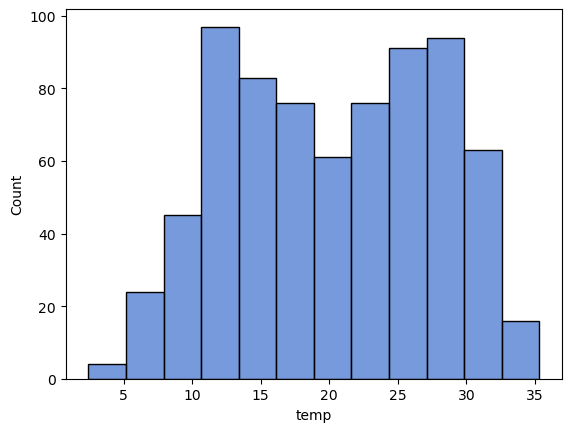

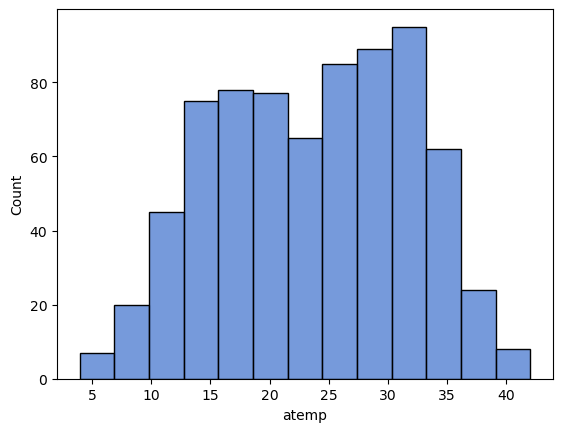

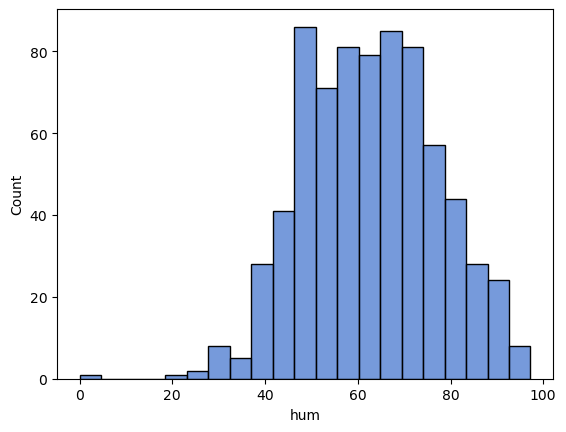

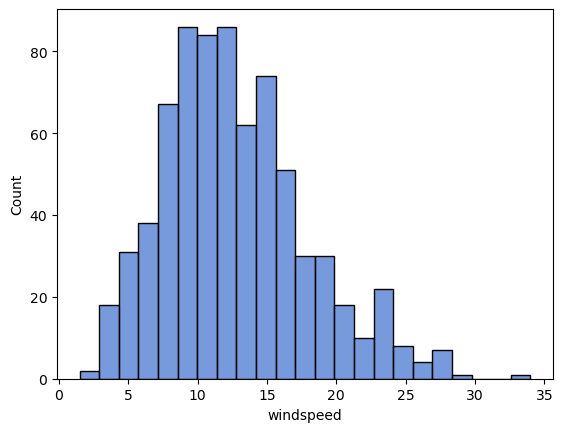

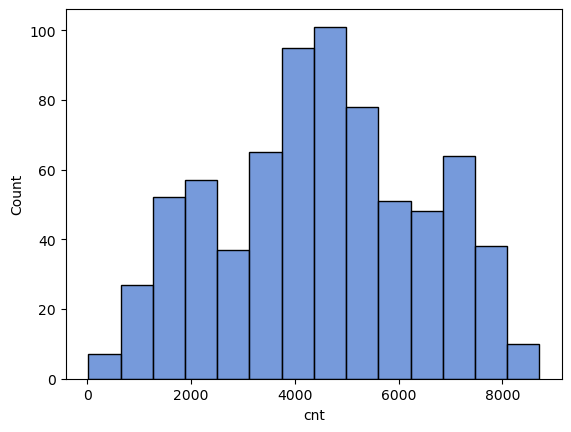

In [18]:
for i in num_cols:
    sns.histplot(x=sharedBike[i])
    plt.show()

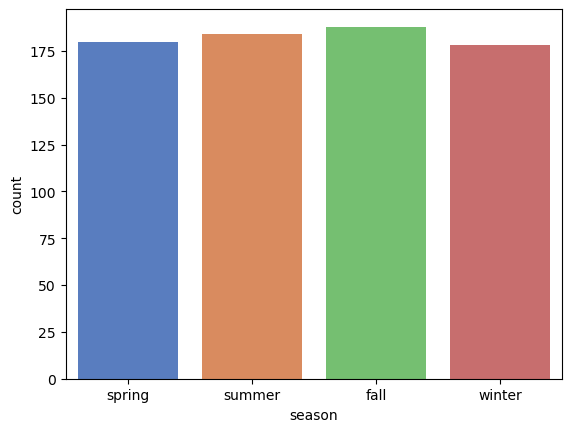

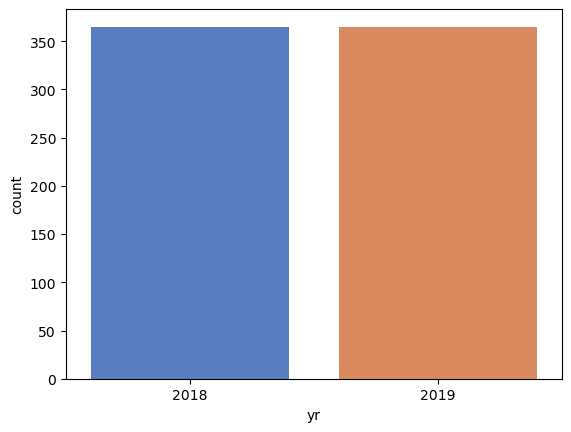

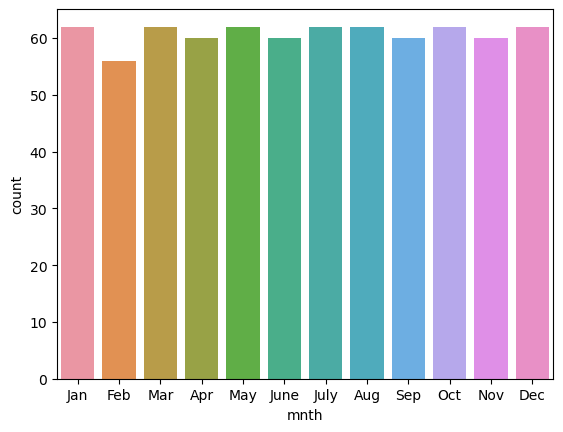

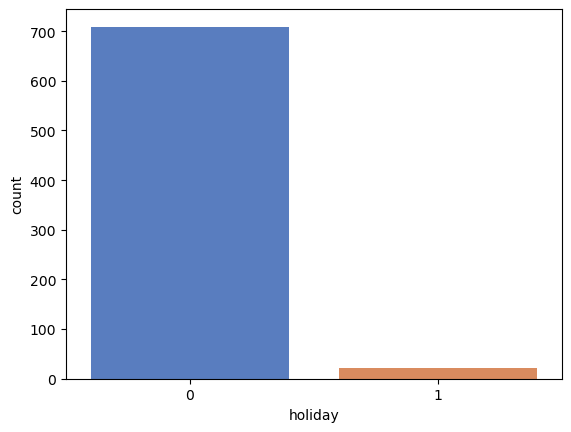

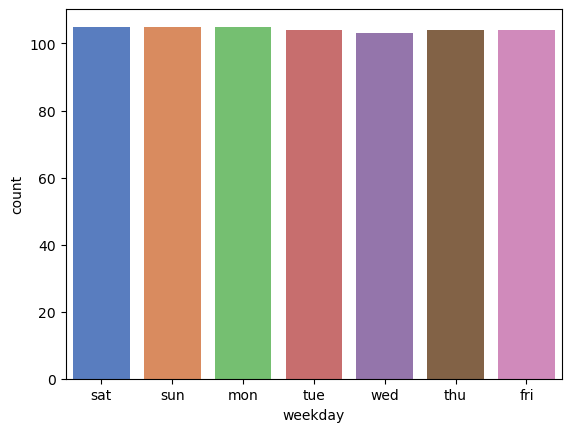

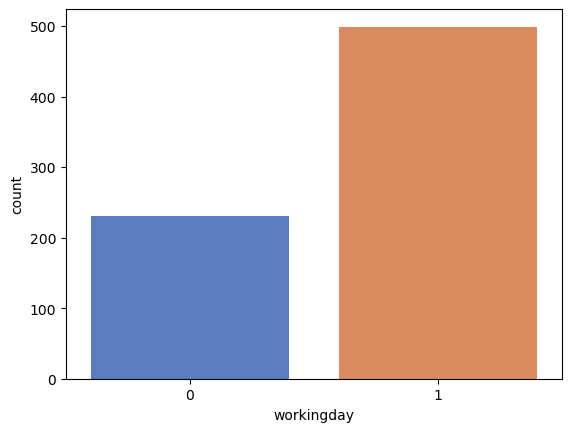

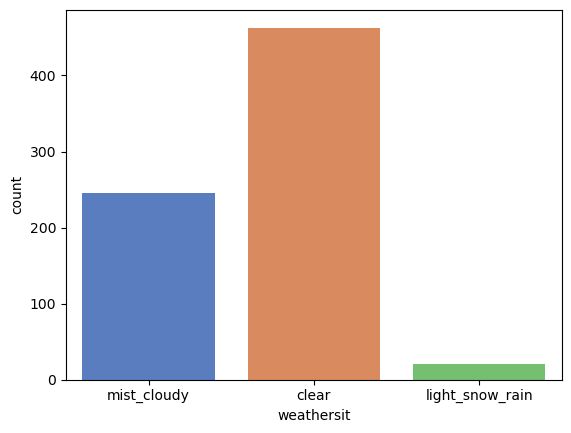

In [19]:
for i in cat_cols:
    sns.countplot(x=sharedBike[i])
    plt.show()

###  Bivariate Analysis

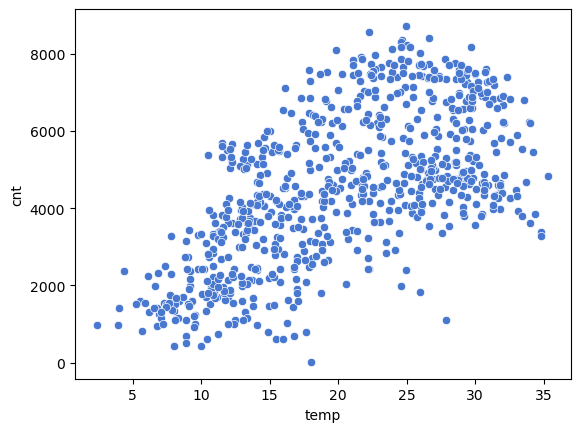

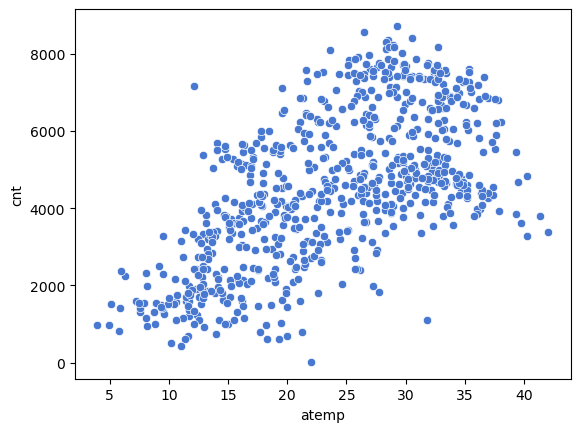

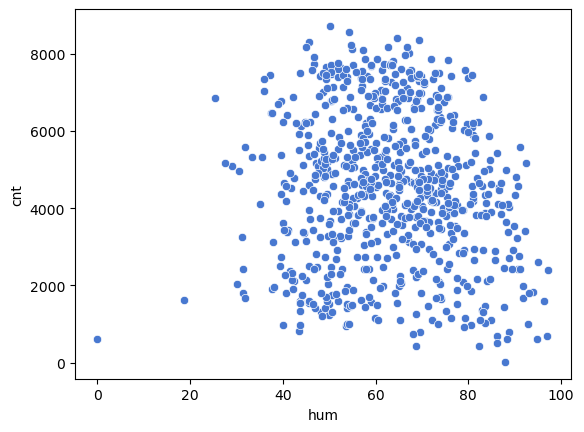

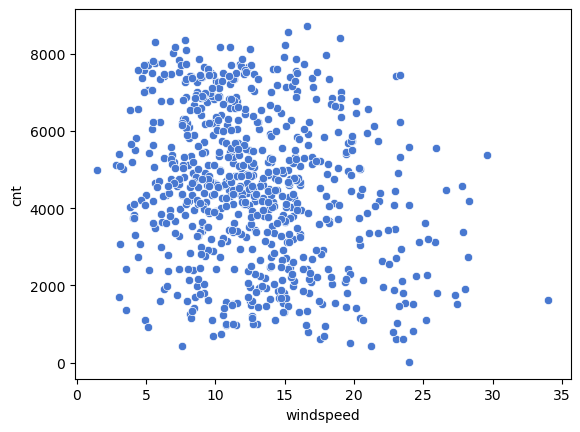

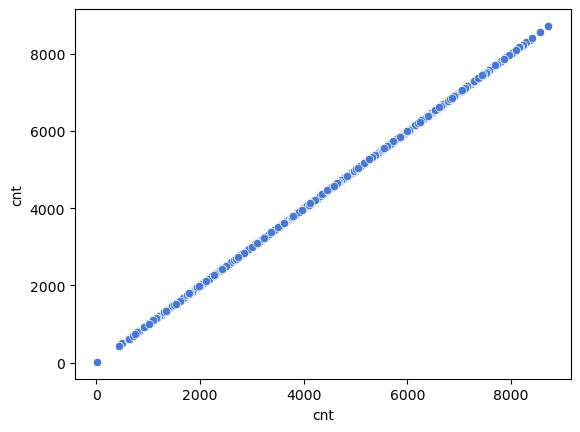

In [20]:
for i in num_cols:
    sns.scatterplot(x=sharedBike[i],y=sharedBike["cnt"])
    plt.show()

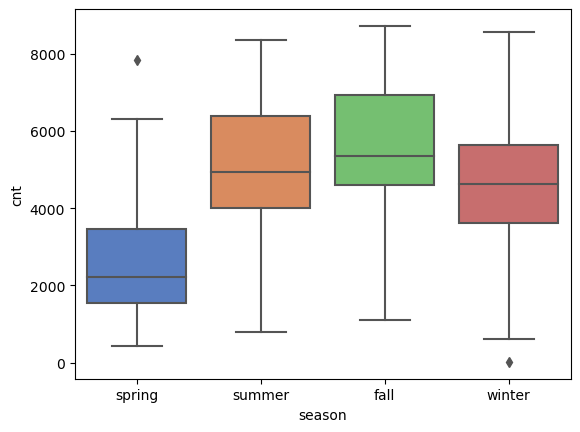

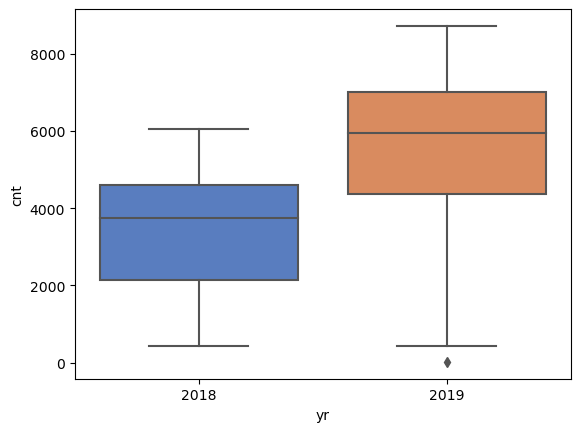

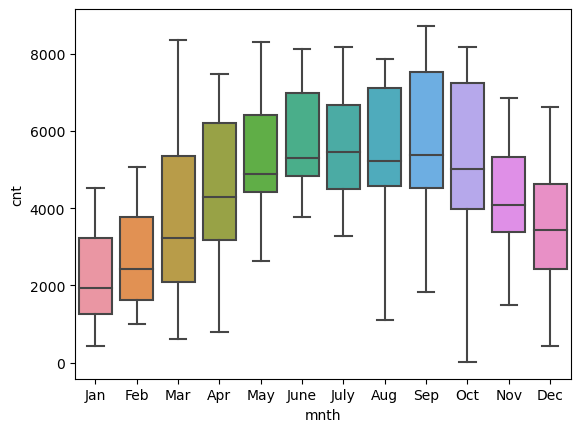

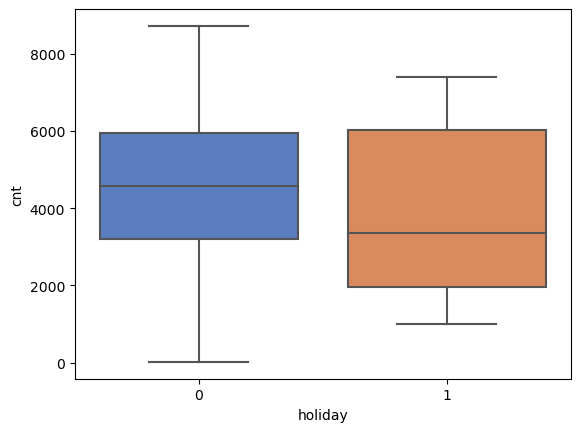

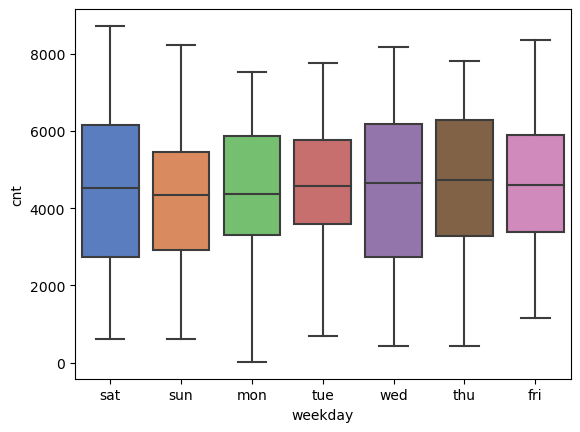

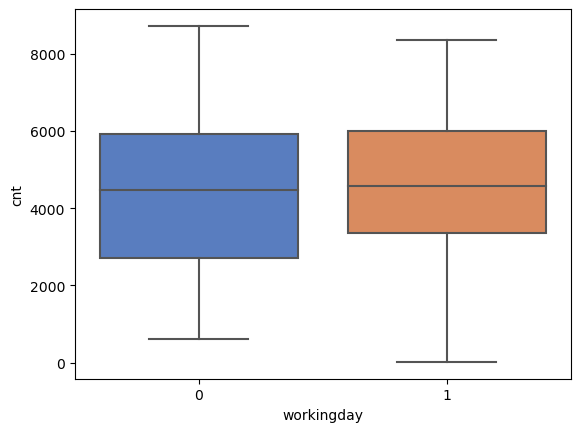

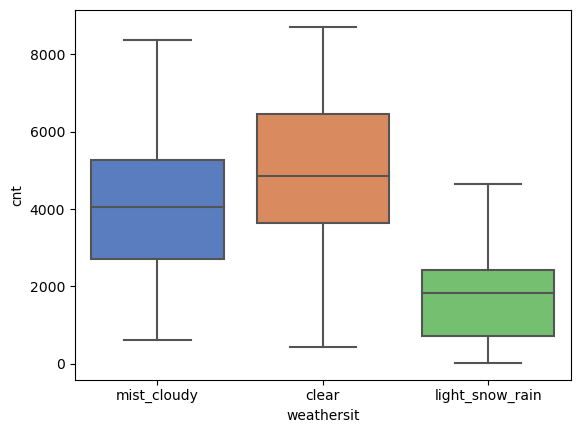

In [21]:
for i in cat_cols:
    sns.boxplot(x=sharedBike[i],y=sharedBike["cnt"])
    plt.show()

## Step 3: Preparing the Data Preparation for Modelling :- 

##### Creating Dummy Features
-  Creating dummies for features which has levels greater than 2
-  Not considering the features which are binary in nature for dummy creation
-  Merging the new dataframe to the original dataframe after creating the dummy
-  Also dropping the col from which the new features are created

### Dummy Variable Creation (One Hot Encoding)

In [22]:
sharedBike[cat_cols].nunique()  # Only for Non -Binary Categorical Columns . 

season         4
yr             2
mnth          12
holiday        2
weekday        7
workingday     2
weathersit     3
dtype: int64

In [23]:
season_dummy = pd.get_dummies(sharedBike.season,drop_first=True,dtype=int) # dummies = n-1 
sharedBike = pd.concat([sharedBike,season_dummy],axis=1)
sharedBike.drop(['season'], axis = 1, inplace = True)
sharedBike.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,2018,Jan,0,sat,0,mist_cloudy,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,2018,Jan,0,sun,0,mist_cloudy,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,2018,Jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,2018,Jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,2018,Jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [24]:
mnth_dummy = pd.get_dummies(sharedBike.mnth,drop_first=True,dtype=int)
sharedBike = pd.concat([sharedBike,mnth_dummy],axis=1)
sharedBike.drop(['mnth'], axis = 1, inplace = True)
sharedBike.head()

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,2018,0,sat,0,mist_cloudy,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2018,0,sun,0,mist_cloudy,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,2018,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,2018,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2018,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [25]:
weekday_dummy = pd.get_dummies(sharedBike.weekday,drop_first=True,dtype=int)
sharedBike = pd.concat([sharedBike,weekday_dummy],axis=1)
sharedBike.drop(['weekday'], axis = 1, inplace = True)
sharedBike.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,mon,sat,sun,thu,tue,wed
0,2018,0,0,mist_cloudy,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2018,0,0,mist_cloudy,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,2018,0,1,clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,2018,0,1,clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2018,0,1,clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [26]:
weathersit_dummy = pd.get_dummies(sharedBike.weathersit,drop_first=True,dtype=int)
sharedBike = pd.concat([sharedBike,weathersit_dummy],axis=1)
sharedBike.drop(['weathersit'], axis = 1, inplace = True)
sharedBike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,mon,sat,sun,thu,tue,wed,light_snow_rain,mist_cloudy
0,2018,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,2018,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,2018,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,2018,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,2018,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [27]:
#Again converting into binary form after visualization

sharedBike.yr = sharedBike.yr.map({'2018': 0 ,'2019' : 1})

In [28]:
sharedBike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               730 non-null    int64  
 1   holiday          730 non-null    int64  
 2   workingday       730 non-null    int64  
 3   temp             730 non-null    float64
 4   atemp            730 non-null    float64
 5   hum              730 non-null    float64
 6   windspeed        730 non-null    float64
 7   cnt              730 non-null    int64  
 8   spring           730 non-null    int64  
 9   summer           730 non-null    int64  
 10  winter           730 non-null    int64  
 11  Aug              730 non-null    int64  
 12  Dec              730 non-null    int64  
 13  Feb              730 non-null    int64  
 14  Jan              730 non-null    int64  
 15  July             730 non-null    int64  
 16  June             730 non-null    int64  
 17  Mar             

In [29]:
# sharedBike.columns = sharedBike.columns.astype(str) 

In [30]:
sharedBike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               730 non-null    int64  
 1   holiday          730 non-null    int64  
 2   workingday       730 non-null    int64  
 3   temp             730 non-null    float64
 4   atemp            730 non-null    float64
 5   hum              730 non-null    float64
 6   windspeed        730 non-null    float64
 7   cnt              730 non-null    int64  
 8   spring           730 non-null    int64  
 9   summer           730 non-null    int64  
 10  winter           730 non-null    int64  
 11  Aug              730 non-null    int64  
 12  Dec              730 non-null    int64  
 13  Feb              730 non-null    int64  
 14  Jan              730 non-null    int64  
 15  July             730 non-null    int64  
 16  June             730 non-null    int64  
 17  Mar             

### Step 4: Splitting the Data into Training and Testing Sets -- ( Train - Test Split ) 
As we know, the first basic step for Regression is performing a train-test split.

In [31]:
# X = sharedBike.drop(['cnt'], axis = 1)
# y = sharedBike['cnt']

In [32]:
# from sklearn.model_selection import train_test_split

# # We specify this so that the train and test data set always have the same rows, respectively
# X_train,X_test,y_train,y_test=train_test_split(X,y,train_size= 0.7, test_size=0.3,random_state=100)

# print(X_test.shape)
# print(X_train.shape)
# print(y_test.shape)
# print(y_train.shape)


In [33]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(sharedBike, train_size = 0.7, test_size = 0.3, random_state = 100)


print(df_test.shape)
print(df_train.shape)

(219, 30)
(510, 30)


In [34]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,mon,sat,sun,thu,tue,wed,light_snow_rain,mist_cloudy
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [35]:
# # Scalling the data
# X_train=(X_train-X_train.mean())/ X_train.std()
# X_test=(X_test-X_test.mean())/ X_test.std()

#### Rescaling the Features :- 

- Min-Max scaling (Normalization) - Converts the data b/w 0 & 1 . 
- Standardisation (mean-0, sigma-1).

This time, we will use MinMax scaling.



In [36]:
# Re-Scalling the Data 

from sklearn.preprocessing import MinMaxScaler
# Instanciate an object :-
scaler = MinMaxScaler()


# Create a list of numeric variables 

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables. 
scalable_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[scalable_vars] = scaler.fit_transform(df_train[scalable_vars])

df_train.describe().T


,count,mean,std,min,25%,50%,75%,max
yr,510.0,0.507843,0.500429,0.0,0.000000,1.000000,1.000000,1.0
holiday,510.0,0.025490,0.157763,0.0,0.000000,0.000000,0.000000,1.0
workingday,510.0,0.676471,0.468282,0.0,0.000000,1.000000,1.000000,1.0
temp,510.0,0.537262,0.225844,0.0,0.339853,0.540519,0.735215,1.0
atemp,510.0,0.512989,0.212385,0.0,0.332086,0.526811,0.688457,1.0
hum,510.0,0.650369,0.145882,0.0,0.538643,0.653714,0.754830,1.0
windspeed,510.0,0.320768,0.169797,0.0,0.199179,0.296763,0.414447,1.0
cnt,510.0,0.513620,0.224593,0.0,0.356420,0.518638,0.684710,1.0
spring,510.0,0.243137,0.429398,0.0,0.000000,0.000000,0.000000,1.0
summer,510.0,0.245098,0.430568,0.0,0.000000,0.000000,0.000000,1.0


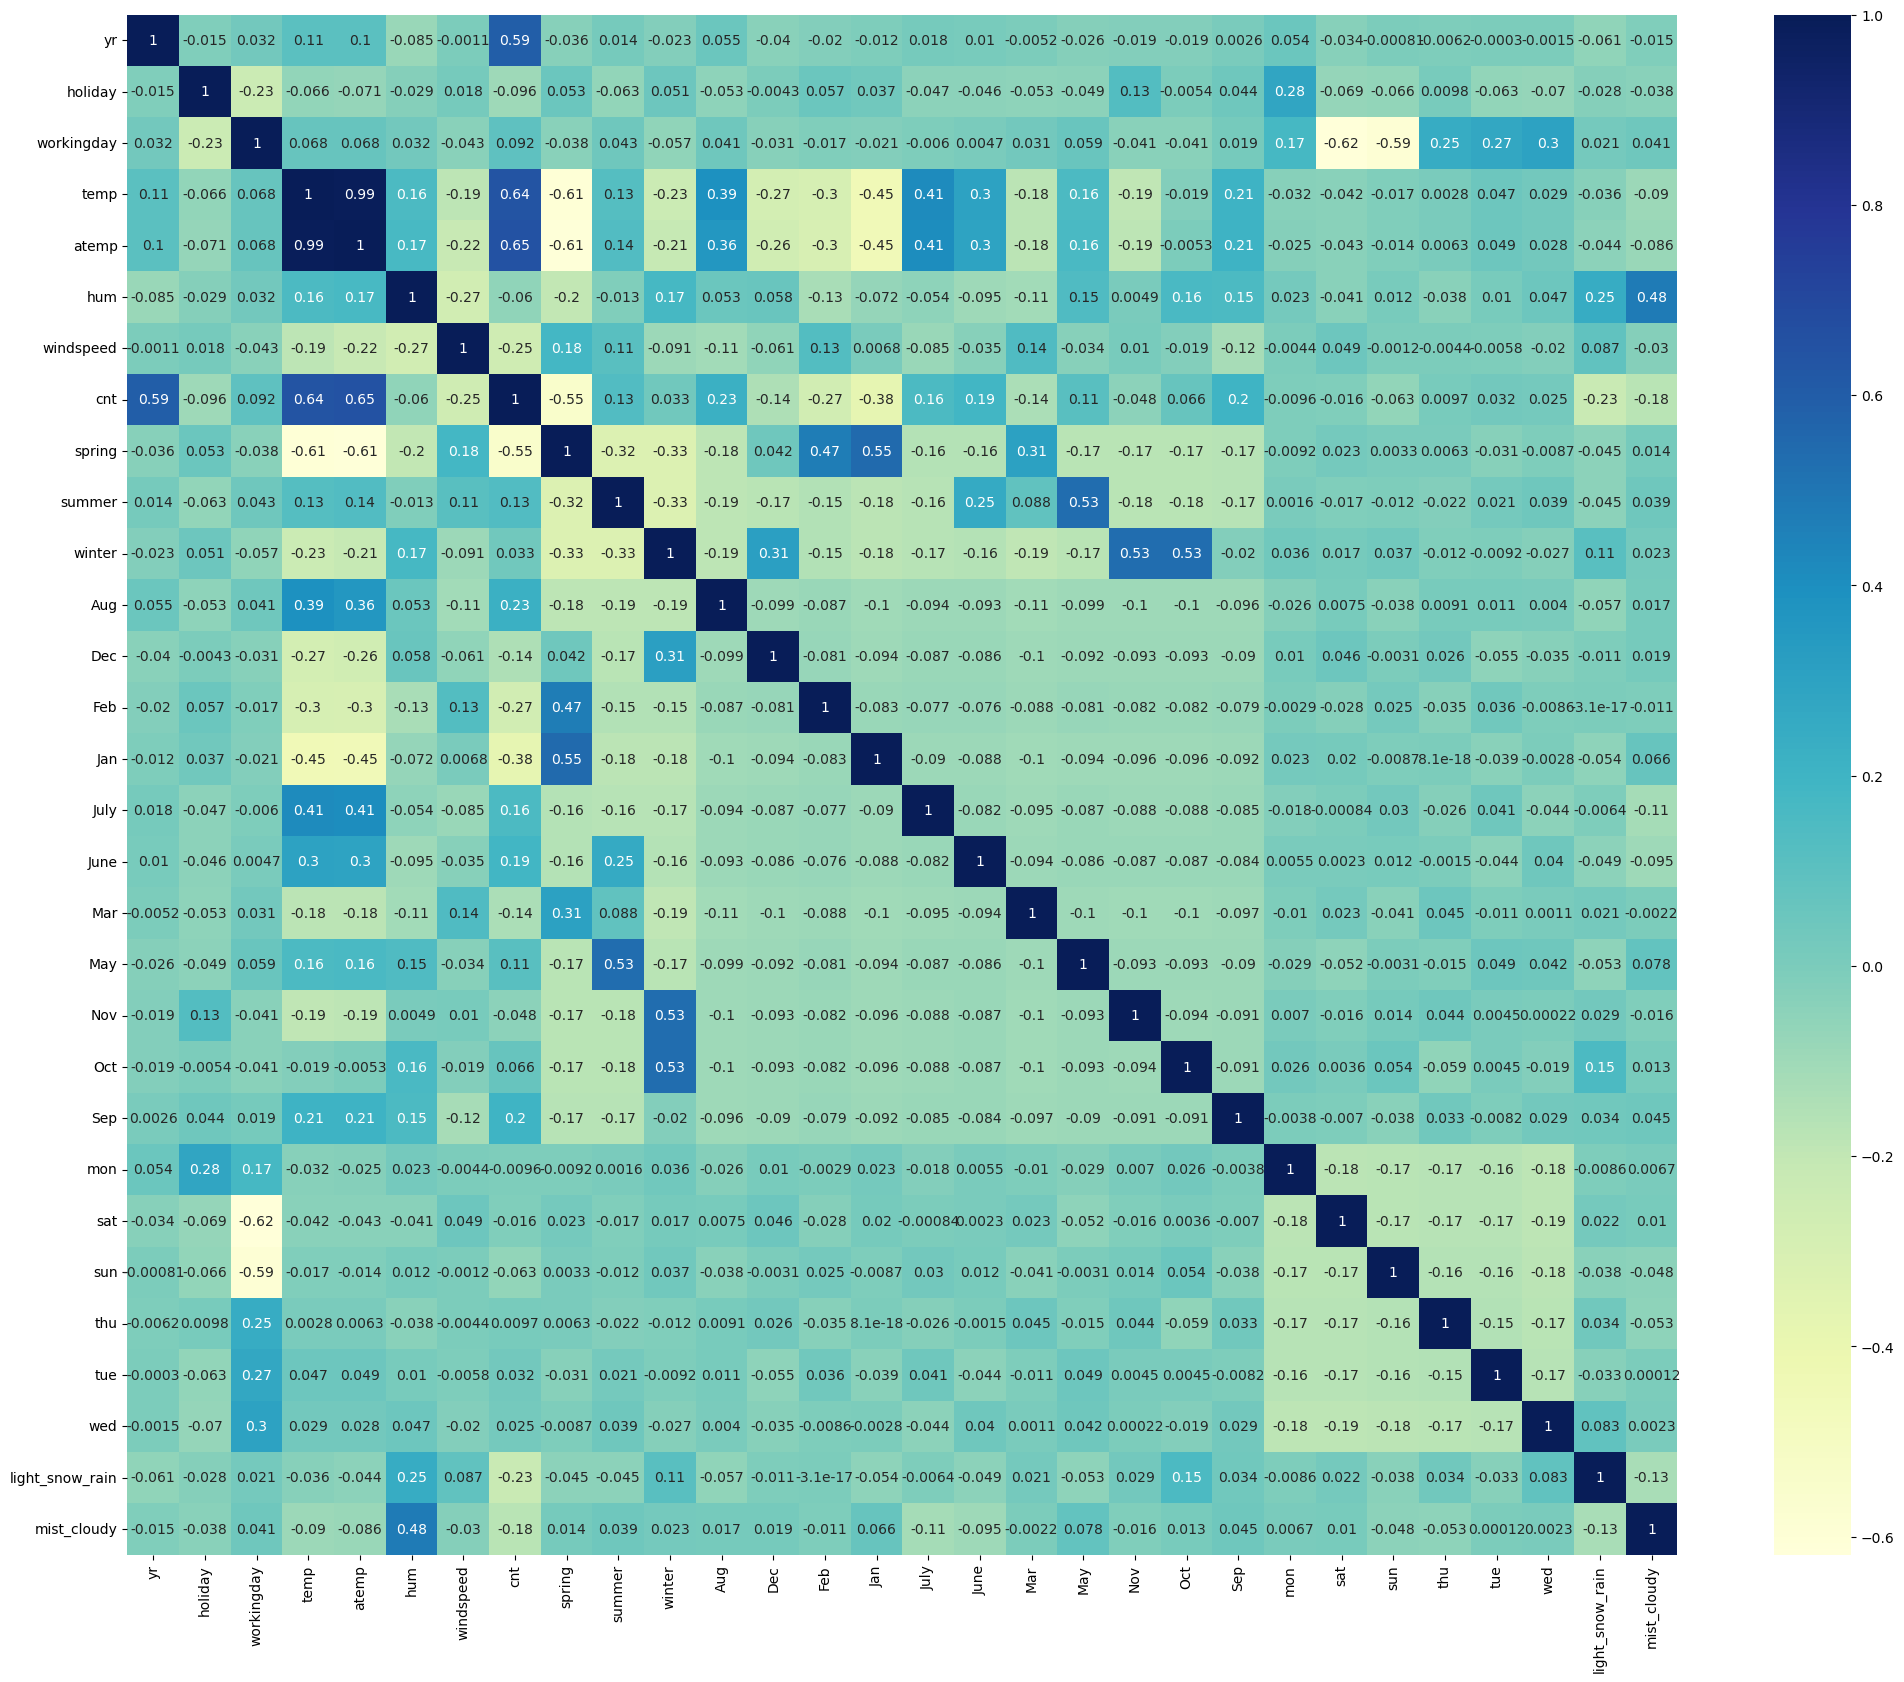

In [37]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()


##### Dividing into X and Y sets for the model building

In [38]:
y_train = df_train.pop('cnt')
X_train = df_train

### Step 5 : Model Building 
#### Feature Selection

In [39]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

#Creating the instance
estimator=LinearRegression()
selector=RFE(estimator,n_features_to_select=15)


#Running RFE
selector=selector.fit(X_train,y_train)
selector.support_

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False, False, False, False,  True, False, False, False,
       False, False,  True, False,  True,  True, False, False, False,
        True,  True])

In [40]:
list(zip(X_train.columns, selector.support_, selector.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 8),
 ('Dec', False, 4),
 ('Feb', False, 5),
 ('Jan', False, 2),
 ('July', True, 1),
 ('June', False, 15),
 ('Mar', False, 13),
 ('May', False, 7),
 ('Nov', False, 3),
 ('Oct', False, 11),
 ('Sep', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 12),
 ('tue', False, 10),
 ('wed', False, 14),
 ('light_snow_rain', True, 1),
 ('mist_cloudy', True, 1)]

##### Selected Features using RFE

In [41]:
selected_features=X_train.columns[selector.support_]
selected_features

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'July', 'Sep', 'sat', 'sun', 'light_snow_rain',
       'mist_cloudy'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [42]:
def vif_calculations(dataframe):
    vif = pd.DataFrame()
    X = dataframe.copy()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

In [43]:
# Creating X_train_rfe dataframe with RFE selected variables
X_train_rfe = X_train[selected_features]

In [44]:
import statsmodels.api as sm

X_train_rfe = sm.add_constant(X_train_rfe)  #X_train_sm["const"]=1
X_train_rfe.head()

,const,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,July,Sep,sat,sun,light_snow_rain,mist_cloudy
653,1.0,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0
576,1.0,1,0,1,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,0,0
426,1.0,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,1,0,0,1
728,1.0,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,1,0,0
482,1.0,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,1,0,0,1


In [45]:
# Creating the First Model 

model1=sm.OLS(y_train,X_train_rfe)
res1=model1.fit()
print(res1.summary())


print('*************************************')
print('--Variance Inflation Factor--')

#Calculating VIF for current Features
vif_calculations(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          1.13e-191
Time:                        23:55:56   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1989      0.028     

- We could have :- 

    - High p-Value , high VIF 
    - High - Low :-- 
        - High p, low VIF  --> remove these first then proceeed for later one's.
        - Low p , High VIF --> this should be removed later once we removed earlier ones. 
    - Low p , low VIF 


- Feature ( **Holiday** ) has highest P-value 0f 0.373, also it's VIF is inf, so this feature needs to be dropped. 

In [46]:
X_train_rfe.drop('holiday', axis=1, inplace=True)

#Recreating model after dropping holiday

model2 = sm.OLS(y_train, X_train_rfe).fit()
print(model2.summary())

print('*************************************')
print('--Variance Inflation Factor--')

# Calculation of VIF for current Features
vif_calculations(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          1.13e-191
Time:                        23:55:56   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1799      0.042     

- Feature ( **sun** ) has highest P-value 0f 0.028, so this feature needs to be dropped. 

In [47]:
X_train_rfe.drop('sun', axis=1, inplace=True)

#Recreating model after dropping sun

model3 = sm.OLS(y_train, X_train_rfe).fit()
print(model3.summary())

print('*************************************')
print('--Variance Inflation Factor--')

# Calculation of VIF for current Features
vif_calculations(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     209.4
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          8.51e-192
Time:                        23:55:56   Log-Likelihood:                 515.37
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     496   BIC:                            -943.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2298      0.036     

- Feature ( **spring** ) has highest P-value of 0.006 & VIF value of 5.02, so this feature needs to be dropped. 

In [48]:
X_train_rfe.drop('spring', axis=1, inplace=True)

#Recreating model after dropping spring

model4 = sm.OLS(y_train, X_train_rfe).fit()
print(model4.summary())

print('*************************************')
print('--Variance Inflation Factor--')

# Calculation of VIF for current Features
vif_calculations(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     223.3
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          2.26e-191
Time:                        23:55:56   Log-Likelihood:                 511.55
No. Observations:                 510   AIC:                            -997.1
Df Residuals:                     497   BIC:                            -942.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1705      0.028     

- Feature ( **July** ) has highest P-value of 0.014 so this feature needs to be dropped. 

In [49]:
X_train_rfe.drop('July', axis=1, inplace=True)

#Recreating model after dropping July

model5 = sm.OLS(y_train, X_train_rfe).fit()
print(model5.summary())

print('*************************************')
print('--Variance Inflation Factor--')

# Calculation of VIF for current Features
vif_calculations(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     240.6
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          2.89e-191
Time:                        23:55:56   Log-Likelihood:                 508.45
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     498   BIC:                            -942.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1698      0.029     

##### Latest Train Model Obeservation:
-  `R-squared` value is good : `0.842`
-  `Adjusted R-squared` value is good : `0.838` which is close to R-squared.
-  `P-value` for every feature is low means the features are significant in nature.
-  `VIF` for every feature is below `5`, so every feature in significant in nature.

In [50]:
#Checking paramters coefficient values
round(model5.params, 3)

const              0.170
yr                 0.229
workingday         0.054
temp               0.571
hum               -0.161
windspeed         -0.186
summer             0.090
winter             0.141
Sep                0.103
sat                0.063
light_snow_rain   -0.244
mist_cloudy       -0.055
dtype: float64

## Step 6 : Residual Analysis

In [51]:
y_train_predict = model5.predict(X_train_rfe)

In [52]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [53]:
y_train_predict.head()

653    0.735786
576    0.751895
426    0.508780
728    0.335463
482    0.606345
dtype: float64

In [54]:
res = y_train - y_train_predict

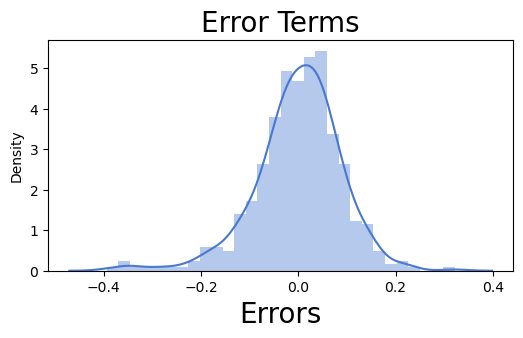

In [55]:
plt.figure(figsize=(6,3))
sns.distplot(res, )
plt.title('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 20)
plt.show()

#### It's Distribution is centered around 0 & it's normal in nature. 

## Homoscedasticity

-  No visible pattern observed in the variance of residuals, mostly centred around the bestfit line.

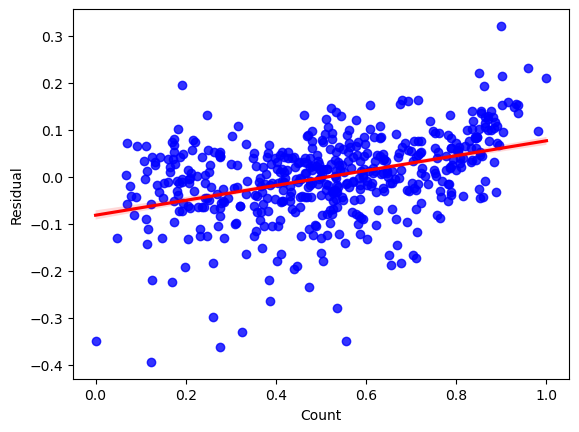

In [56]:
sns.regplot(x=y_train, y=res, fit_reg=True, ci=68, scatter_kws={"color":"blue"}, line_kws={'color':'red'})
plt.xlabel("Count")
plt.ylabel("Residual")
plt.show()

## Checks for Multicolinearity :-

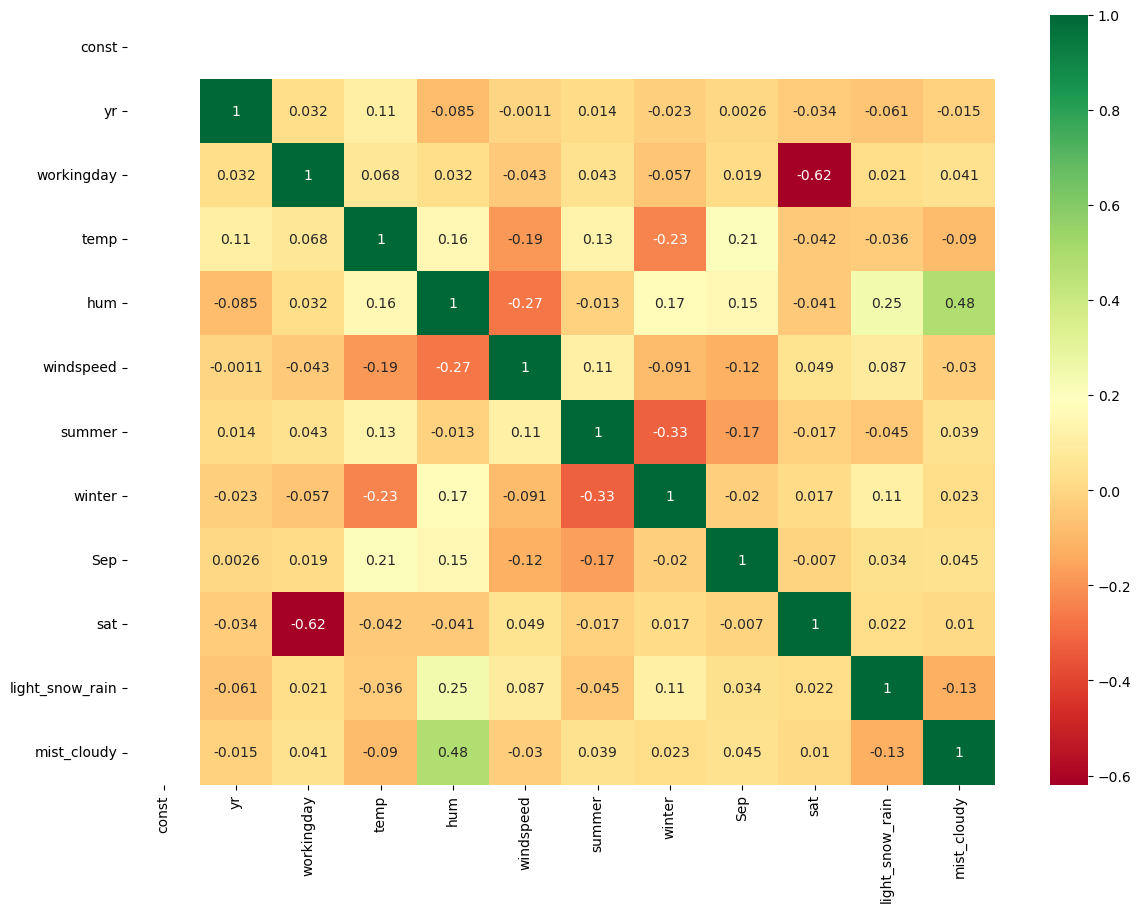

In [57]:
plt.figure(figsize=(14,10))
sns.heatmap(X_train_rfe.corr(),annot = True, cmap="RdYlGn")
plt.show()

## Step 7 : Model Prediction using final Model on test data :- 

In [58]:
# Scaling the test data set
df_test[scalable_vars] = scaler.transform(df_test[scalable_vars])

In [59]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,mon,sat,sun,thu,tue,wed,light_snow_rain,mist_cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [60]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
yr,219.0,0.479452,0.500722,0.000000,0.000000,0.000000,1.000000,1.000000
holiday,219.0,0.036530,0.188034,0.000000,0.000000,0.000000,0.000000,1.000000
workingday,219.0,0.698630,0.459904,0.000000,0.000000,1.000000,1.000000,1.000000
temp,219.0,0.558941,0.233698,0.046591,0.354650,0.558691,0.759096,0.984424
atemp,219.0,0.532991,0.217888,0.025950,0.344751,0.549198,0.714132,0.980934
hum,219.0,0.638508,0.148974,0.261915,0.527265,0.627737,0.743928,1.002146
windspeed,219.0,0.313350,0.159947,-0.042808,0.198517,0.299459,0.403048,0.807474
cnt,219.0,0.520592,0.218435,0.048205,0.377531,0.524275,0.672745,0.963300
spring,219.0,0.255708,0.437258,0.000000,0.000000,0.000000,1.000000,1.000000
summer,219.0,0.264840,0.442259,0.000000,0.000000,0.000000,1.000000,1.000000


In [61]:
#Dividing test data into X and y set 
y_test = df_test.pop('cnt')
X_test = df_test

In [62]:
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [63]:
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,mon,sat,sun,thu,tue,wed,light_snow_rain,mist_cloudy
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [64]:
#Keeping only those cols present in X_train_rfe data

X_train_cols = ['yr','workingday' ,'temp', 'hum', 'windspeed', 'summer', 'winter',
       'Sep', 'sat', 'light_snow_rain', 'mist_cloudy']

In [65]:
X_test_new = X_test[X_train_cols]

In [66]:
X_test_new.head()

,yr,workingday,temp,hum,windspeed,summer,winter,Sep,sat,light_snow_rain,mist_cloudy
184,0,0,0.831783,0.657364,0.084219,0,0,0,0,0,1
535,1,1,0.901354,0.610133,0.153728,1,0,0,0,0,0
299,0,1,0.511964,0.837699,0.334206,0,1,0,0,0,1
221,0,1,0.881625,0.437098,0.339570,0,0,0,0,0,0
152,0,1,0.817246,0.314298,0.537414,1,0,0,0,0,0


In [67]:
X_test_new = sm.add_constant(X_test_new)
X_test_new.head()

,const,yr,workingday,temp,hum,windspeed,summer,winter,Sep,sat,light_snow_rain,mist_cloudy
184,1.0,0,0,0.831783,0.657364,0.084219,0,0,0,0,0,1
535,1.0,1,1,0.901354,0.610133,0.153728,1,0,0,0,0,0
299,1.0,0,1,0.511964,0.837699,0.334206,0,1,0,0,0,1
221,1.0,0,1,0.881625,0.437098,0.339570,0,0,0,0,0,0
152,1.0,0,1,0.817246,0.314298,0.537414,1,0,0,0,0,0


In [68]:
#making predictions using 5th model
y_test_pred = model5.predict(X_test_new)

In [69]:
#Calculating R2 for test model
r2 = r2_score(y_test, y_test_pred)
print(f'R2 Score for test model: {round(r2,3)}')

#Calculating Adjusted R-Square for test model
adj_r2 = round(1-(1-round(r2,3))*(X_test_new.shape[0])/(X_test_new.shape[0]-X_test_new.shape[1]-1),3)
print(f'Adj-R2 Score for test model: {round(adj_r2,3)}')

R2 Score for test model: 0.806
Adj-R2 Score for test model: 0.794


## Step 8: Model Evaluation

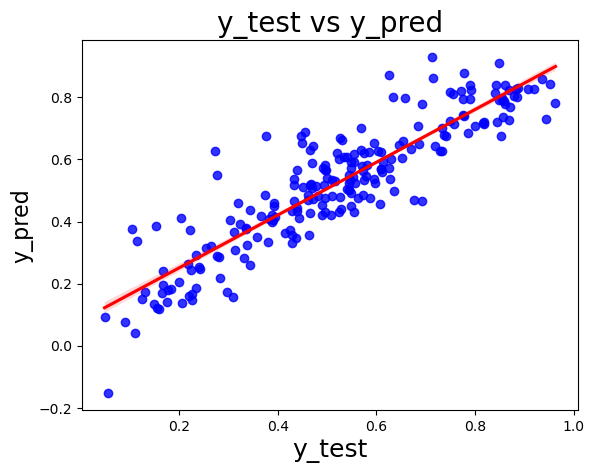

In [70]:
# Plotting y_test and y_test_pred to understand the spread

plt.figure()
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()  

## Best Fit Line Equation :

$ count = 0.170 + 0.229 \times yr + 0.054 \times workingday +  0.571 \times temp - 0.161 \times hum - 0.186 \times windspeed + 0.090 \times summer + 0.141 \times winter + 0.103 \times Sep - 0.063 \times sat - 0.244 \times light_snow_rain - 0.055 \times mist_cloudy $


# Hence , Overall Comparision between Training and Test Dataset: - 

-  Train dataset R - Squared           : 0.842
-  Train dataset Adjusted R-Squared    : 0.838  

-  Test dataset R - Squared            : 0.806
-  Test dataset Adjusted R- Squared    : 0.794